# Visualizing Text Embeddings
Learning how LLMs encode meaning. 

https://platform.openai.com/docs/guides/embeddings

Generate embeddings for text input, compute cosine similarity, and visualize results with Matplotlib.

Embeddings are the core of LLM function and semantics, and visualizations make embeddings accessible. Let's analyze similarity between movie descriptions and visualize embeddings in 2D.



In [3]:
from openai import OpenAI
import os
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import Markdown, display, YouTubeVideo

In [10]:
def printmd(text):
    """
    print md in code cells
    """
    display(Markdown(text))

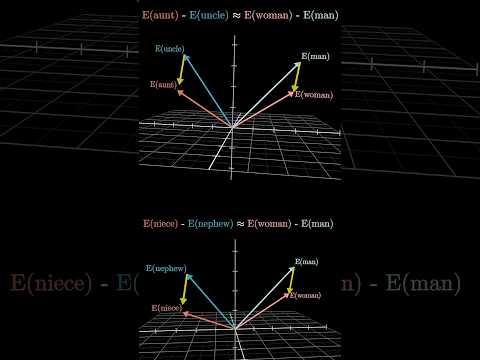

In [4]:
YouTubeVideo('FJtFZwbvkI4', width=350)

In [5]:
# Initialize OpenAI client
try:
    client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
except Exception as e:
    print(f"Error initializing OpenAI client: {e}")
    raise

Movie summaries that we will use to detect semantic similaties. 

In [6]:
movies = [
    # Marvel Superhero Movies
    {
        "title": "Iron Man (2008)",
        "summary": "Billionaire genius Tony Stark builds a high-tech suit to escape captivity and becomes Iron Man, fighting global threats with his wit and advanced technology."
    },
    {
        "title": "The Avengers (2012)",
        "summary": "Earth’s mightiest heroes, including Iron Man, Captain America, Thor, and Hulk, unite to stop Loki and his alien army from conquering the planet."
    },
    {
        "title": "Black Panther (2018)",
        "summary": "T’Challa, king of Wakanda, embraces his role as Black Panther to protect his nation and the world from a powerful enemy threatening their vibranium resources."
    },
    {
        "title": "Spider-Man: No Way Home (2021)",
        "summary": "Peter Parker, unmasked as Spider-Man, teams up with alternate-universe heroes to battle villains from across the multiverse after a spell goes wrong."
    },
    {
        "title": "Captain Marvel (2019)",
        "summary": "Carol Danvers unlocks her cosmic powers as Captain Marvel, joining the fight against the Kree-Skrull war while uncovering her lost memories on Earth."
    },
    # Christmas-Themed Movies
    {
        "title": "Home Alone (1990)",
        "summary": "Young Kevin is accidentally left behind during Christmas vacation and must defend his home from bumbling burglars with clever traps and holiday spirit."
    },
    {
        "title": "Elf (2003)",
        "summary": "Buddy, a human raised by elves, journeys to New York City to find his real father, spreading Christmas cheer in a world that’s lost its festive spark."
    },
    {
        "title": "The Polar Express (2004)",
        "summary": "A young boy boards a magical train to the North Pole, embarking on a heartwarming adventure that tests his belief in the magic of Christmas."
    },
    {
        "title": "A Christmas Carol (2009)",
        "summary": "Ebenezer Scrooge, a miserly old man, is visited by three ghosts on Christmas Eve, learning the value of kindness and the true meaning of the holiday."
    },
    {
        "title": "Love Actually (2003)",
        "summary": "Interwoven stories of love, loss, and connection unfold in London during the Christmas season, celebrating the messy beauty of human relationships."
    },
    # Romantic Comedies
    {
        "title": "When Harry Met Sally... (1989)",
        "summary": "Harry and Sally’s evolving friendship over years sparks debates about love and friendship, culminating in a heartfelt realization during a New Year’s Eve confession."
    },
    {
        "title": "The Proposal (2009)",
        "summary": "A high-powered executive forces her assistant into a fake engagement to avoid deportation, leading to unexpected romance during a chaotic family weekend in Alaska."
    },
    {
        "title": "Crazy Rich Asians (2018)",
        "summary": "Rachel Chu accompanies her boyfriend to Singapore, facing his ultra-wealthy family’s disapproval in a whirlwind of opulence, tradition, and newfound love."
    },
    {
        "title": "10 Things I Hate About You (1999)",
        "summary": "A rebellious teen, Kat, is wooed by bad-boy Patrick in a modern Shakespearean tale of high school romance, deception, and heartfelt connection."
    },
    {
        "title": "Notting Hill (1999)",
        "summary": "A humble London bookseller falls for a famous American actress, navigating fame, cultural clashes, and personal insecurities to pursue an unlikely love story."
    }
]

In [7]:
movie_summaries = [movie['summary'] for movie in movies]
movie_titles = [movie['title'] for movie in movies]
pprint(movie_summaries)

['Billionaire genius Tony Stark builds a high-tech suit to escape captivity '
 'and becomes Iron Man, fighting global threats with his wit and advanced '
 'technology.',
 'Earth’s mightiest heroes, including Iron Man, Captain America, Thor, and '
 'Hulk, unite to stop Loki and his alien army from conquering the planet.',
 'T’Challa, king of Wakanda, embraces his role as Black Panther to protect his '
 'nation and the world from a powerful enemy threatening their vibranium '
 'resources.',
 'Peter Parker, unmasked as Spider-Man, teams up with alternate-universe '
 'heroes to battle villains from across the multiverse after a spell goes '
 'wrong.',
 'Carol Danvers unlocks her cosmic powers as Captain Marvel, joining the fight '
 'against the Kree-Skrull war while uncovering her lost memories on Earth.',
 'Young Kevin is accidentally left behind during Christmas vacation and must '
 'defend his home from bumbling burglars with clever traps and holiday spirit.',
 'Buddy, a human raised by

Generate embeddings for the reviews

The `text-embedding-3-small` model converts text into numerical vectors and captures the "meaning" of the input text (in this case the movie reviews). This can be extremely useful for sentiment analysis or clustering in analytics pipelines.

TODO: add more discussion (3blue1brown video above captures this; this view has a deep history and is the basis for self-attention).

In [8]:
try:
    embeddings = []
    for summary in movie_summaries:
        response = client.embeddings.create(
            model="text-embedding-3-small",
            input=summary
        )
        embeddings.append(response.data[0].embedding)
    embeddings = np.array(embeddings)
except Exception as e:
    print(f"Error generating embeddings: {e}")
    raise

Get cosine similarity between reviews.

Cosine Similarity measures similarity between reviews (1 = identical, 0 = unrelated). It can help identify similar content (e.g., for recommendation systems : if you like this movie, you might like that movie).

Following cell is incomprehensible, need to improve. 

TODO: use seaborn to visualize as heatmap, add title to make more clear.

In [11]:
similarity_matrix = cosine_similarity(embeddings)
printmd("**Cosine Similarity Matrix:**")
pprint(similarity_matrix)

**Cosine Similarity Matrix:**

array([[1.        , 0.44638748, 0.35987185, 0.41178667, 0.31059084,
        0.22011265, 0.19328305, 0.12573146, 0.13155262, 0.04527634,
        0.12584849, 0.17852728, 0.17527075, 0.21035201, 0.16859286],
       [0.44638748, 1.        , 0.4029404 , 0.45721963, 0.40754198,
        0.19718652, 0.2336915 , 0.17151516, 0.16418516, 0.10166716,
        0.11117503, 0.14923556, 0.1105178 , 0.11242099, 0.11820223],
       [0.35987185, 0.4029404 , 1.        , 0.33928751, 0.32624654,
        0.15764395, 0.16259981, 0.13170946, 0.08877917, 0.09458414,
        0.04942586, 0.12633272, 0.15933429, 0.16117361, 0.09758416],
       [0.41178667, 0.45721963, 0.33928751, 1.        , 0.41819573,
        0.24223534, 0.28904873, 0.1769743 , 0.16690697, 0.15327498,
        0.2077566 , 0.20936276, 0.17354972, 0.23766342, 0.21863238],
       [0.31059084, 0.40754198, 0.32624654, 0.41819573, 1.        ,
        0.22879443, 0.16595081, 0.14302146, 0.09775523, 0.15119973,
        0.13582243, 0.20267077, 0.14650045, 

In [12]:
embeddings.shape

(15, 1536)

Examine embeddings in 2d using PCA

PCA reduces high-dimensional embeddings (1500-dimensions) to 2D for intuitive plots, making embeddings easy to visualize. It makes more clear the similarity relations that the cosine metric measures. See [scikit-learn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

It's hard to overstate how important this kind of perspective is in the development of LLMs/self-attention etc!

TODO: 
- Make the following 2d projection interactive (plotly, bokeh, matplotlib) -- hover and show title. 
- Discuss other embeddings: umap, tsne.

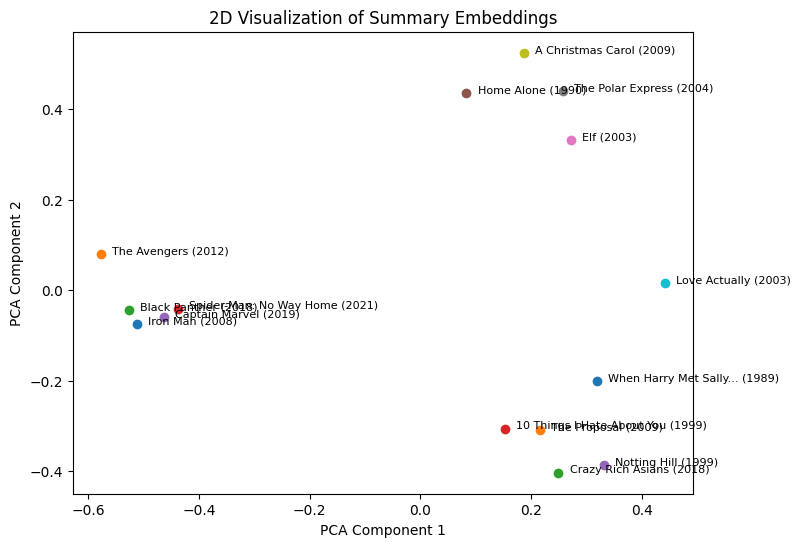

In [13]:
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Visualize embeddings
plt.figure(figsize=(8, 6))
for i, summary in enumerate(movie_summaries):
    title = movie_titles[i]
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.text(embeddings_2d[i, 0] + 0.02, embeddings_2d[i, 1], title, size=8)
plt.title("2D Visualization of Summary Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()